<a href="https://colab.research.google.com/github/Archit269/RAR-designs-using-Biomarker-info/blob/main/Regression_Project_on_RAR_and_NN(Breast_Cancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_excel('Query_5_years.xlsx')
df

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
0,54,3,1,Beam radiation,Yes,Radiation after surgery,Negative,Negative,25,Positive,14,Alive,White,Female,Alive,2011,2016,5,Alive
1,59,3,1,Beam radiation,Yes,Radiation after surgery,Positive,Negative,36,Negative,19,Alive,White,Female,Alive,2011,2016,5,Alive
2,54,0,2,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,6,Negative,5,Alive,White,Female,Alive,2010,2016,6,Alive
3,58,0,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,1,Negative,1,Alive,White,Female,Alive,2010,2016,6,Alive
4,89,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Positive,17,Negative,1,Alive,White,Female,Alive,2011,2016,5,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35344,82,98,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Negative,Blank(s),Negative,0,Other Cause of Death,White,Female,Dead,2016,2016,0,Dead
35345,64,10,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Negative,65,Negative,11,Breast,White,Female,Dead,2014,2016,2,Dead
35346,42,0,2,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Positive,200,Negative,24,Alive,White,Female,Alive,2010,2016,6,Alive
35347,98,99,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Unknown,Unknown,999,Unknown,99,Other Cause of Death,Black,Female,Dead,2013,2016,3,Dead


In [3]:
df.columns

Index(['Age at diagnosis', 'Regional nodes positive (1988+)',
       'Total number of in situ/malignant tumors for patient',
       'Radiation recode', 'Chemotherapy recode',
       'Radiation sequence with surgery',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'CS tumor size (2004-2015)',
       'Derived HER2 Recode (2010+)', 'Regional nodes examined (1988+)',
       'COD to site recode', 'Race recode', 'Sex',
       'Vital status recode (study cutoff used)', 'Diagnosis_year',
       'Last_fu _year', 'interva_years', 'stutus_5_years'],
      dtype='object')

In [4]:
df.drop(df.loc[df['CS tumor size (2004-2015)']=='Blank(s)'].index, inplace=True)

filtered_df = df.loc[(df['CS tumor size (2004-2015)'].astype('float32')<900) & (df['Regional nodes positive (1988+)'].astype('float32')<99)]
filtered_df = df.loc[(df['Regional nodes examined (1988+)'].astype('float32')<99)&(df['Regional nodes examined (1988+)']>0)]
filtered_df


,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
0,54,3,1,Beam radiation,Yes,Radiation after surgery,Negative,Negative,25,Positive,14,Alive,White,Female,Alive,2011,2016,5,Alive
1,59,3,1,Beam radiation,Yes,Radiation after surgery,Positive,Negative,36,Negative,19,Alive,White,Female,Alive,2011,2016,5,Alive
2,54,0,2,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,6,Negative,5,Alive,White,Female,Alive,2010,2016,6,Alive
3,58,0,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,1,Negative,1,Alive,White,Female,Alive,2010,2016,6,Alive
4,89,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Positive,17,Negative,1,Alive,White,Female,Alive,2011,2016,5,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35303,56,0,1,None/Unknown,Yes,No radiation and/or cancer-directed surgery,Positive,Positive,15,Negative,7,Alive,White,Female,Alive,2011,2016,5,Alive
35305,55,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Positive,30,Negative,1,Alive,Black,Female,Alive,2010,2016,6,Alive
35328,51,0,1,None/Unknown,Yes,No radiation and/or cancer-directed surgery,Unknown,Unknown,999,Unknown,98,Breast,White,Female,Dead,2015,2015,0,Dead
35345,64,10,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Negative,65,Negative,11,Breast,White,Female,Dead,2014,2016,2,Dead


# BIOMARKER VALUES USED:
1) ER STATUS

2) PR STATUS

3) HER2 STATUS

4) CS TUMOR SIZE

5) REGIONAL NODES POSITIVE

# TREATMENT EFFECTIVENESS MEASURE:
1)NUMBER OF REGIONAL NODES EXAMINED

2)STATUS

Adequate Staging: Generally, examining a sufficient number of lymph nodes (typically 10-12) is recommended for accurate staging in breast cancer.

In [5]:
df_main = filtered_df[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)','Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
              'Radiation recode','Chemotherapy recode','Radiation sequence with surgery','Regional nodes examined (1988+)','stutus_5_years']]
df_main

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years
0,54,Negative,Negative,Positive,25,3,Beam radiation,Yes,Radiation after surgery,14,Alive
1,59,Positive,Negative,Negative,36,3,Beam radiation,Yes,Radiation after surgery,19,Alive
2,54,Positive,Positive,Negative,6,0,Beam radiation,No/Unknown,Radiation after surgery,5,Alive
3,58,Positive,Positive,Negative,1,0,Beam radiation,No/Unknown,Radiation after surgery,1,Alive
4,89,Negative,Positive,Negative,17,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,Alive
...,...,...,...,...,...,...,...,...,...,...,...
35303,56,Positive,Positive,Negative,15,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,7,Alive
35305,55,Positive,Positive,Negative,30,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,Alive
35328,51,Unknown,Unknown,Unknown,999,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,98,Dead
35345,64,Positive,Negative,Negative,65,10,Beam radiation,No/Unknown,Radiation after surgery,11,Dead


In [6]:
df_main['treatment'] = df_main['Radiation recode'] + '_' + df_main['Chemotherapy recode'] + '_' + df_main['Radiation sequence with surgery']
df_main['LNR'] = df_main['Regional nodes positive (1988+)'] / df_main['Regional nodes examined (1988+)']



<ipython-input-6-5ac4bc3c7471>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['treatment'] = df_main['Radiation recode'] + '_' + df_main['Chemotherapy recode'] + '_' + df_main['Radiation sequence with surgery']
<ipython-input-6-5ac4bc3c7471>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['LNR'] = df_main['Regional nodes positive (1988+)'] / df_main['Regional nodes examined (1988+)']


In [7]:
treatment_counts = df_main.groupby('treatment').size().reset_index(name='patient_count')

# Display the resulting DataFrame
print(treatment_counts)

                                            treatment  patient_count
0   Beam radiation_No/Unknown_Intraoperative rad w...              6
1   Beam radiation_No/Unknown_Intraoperative radia...             18
2   Beam radiation_No/Unknown_No radiation and/or ...             24
3   Beam radiation_No/Unknown_Radiation after surgery           7985
4   Beam radiation_No/Unknown_Radiation before and...              5
5   Beam radiation_No/Unknown_Radiation prior to s...             24
6   Beam radiation_Yes_Intraoperative rad with oth...              4
7         Beam radiation_Yes_Intraoperative radiation              4
8   Beam radiation_Yes_No radiation and/or cancer-...             27
9          Beam radiation_Yes_Radiation after surgery           7999
10  Beam radiation_Yes_Radiation before and after ...             23
11      Beam radiation_Yes_Radiation prior to surgery             60
12  Beam radiation_Yes_Surgery both before and aft...              3
13  Combination of beam with impla

In [8]:
le = LabelEncoder()
df_main['ER Status Recode Breast Cancer (1990+)'] = le.fit_transform(df_main['ER Status Recode Breast Cancer (1990+)'])
df_main['PR Status Recode Breast Cancer (1990+)'] = le.fit_transform(df_main['PR Status Recode Breast Cancer (1990+)'])
df_main['Derived HER2 Recode (2010+)'] = le.fit_transform(df_main['Derived HER2 Recode (2010+)'])
df_main['treatment'] = le.fit_transform(df_main['treatment'])
df_main['stutus_5_years'] = le.fit_transform(df_main['stutus_5_years'])

df_main['CS tumor size (2004-2015)'] = pd.to_numeric(df_main['CS tumor size (2004-2015)'], errors='coerce')
df_main['Regional nodes positive (1988+)'] = pd.to_numeric(df_main['Regional nodes positive (1988+)'], errors='coerce')

df_main['stutus_5_years'] = 1 - df_main['stutus_5_years']





<ipython-input-8-f5002539acd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['ER Status Recode Breast Cancer (1990+)'] = le.fit_transform(df_main['ER Status Recode Breast Cancer (1990+)'])
<ipython-input-8-f5002539acd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['PR Status Recode Breast Cancer (1990+)'] = le.fit_transform(df_main['PR Status Recode Breast Cancer (1990+)'])
<ipython-input-8-f5002539acd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [9]:

# Normalize LNR and tumor size
df_main['LNR_normalized'] = (df_main['LNR'] - df_main['LNR'].min()) / (df_main['LNR'].max() - df_main['LNR'].min())
df_main['tumor_size_normalized'] = (df_main['CS tumor size (2004-2015)'] - df_main['CS tumor size (2004-2015)'].min()) / (df_main['CS tumor size (2004-2015)'].max() - df_main['CS tumor size (2004-2015)'].min())
df_main['age_normalized'] = df_main['Age at diagnosis'] /( df_main['Age at diagnosis'].max()- df_main['Age at diagnosis'].min())

# Create composite measure
df_main['treatment_effectiveness'] = (-5) * df_main['LNR_normalized'] + (-2) * df_main['tumor_size_normalized'] + 18 * df_main['age_normalized']
df_main

<ipython-input-9-175efaa3c47e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['LNR_normalized'] = (df_main['LNR'] - df_main['LNR'].min()) / (df_main['LNR'].max() - df_main['LNR'].min())
<ipython-input-9-175efaa3c47e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['tumor_size_normalized'] = (df_main['CS tumor size (2004-2015)'] - df_main['CS tumor size (2004-2015)'].min()) / (df_main['CS tumor size (2004-2015)'].max() - df_main['CS tumor size (2004-2015)'].min())
<ipython-input-9-175efaa3

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years,treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
0,54,1,1,2,25,3,Beam radiation,Yes,Radiation after surgery,14,1,9,0.214286,0.002165,0.025025,0.642857,11.510556
1,59,2,1,1,36,3,Beam radiation,Yes,Radiation after surgery,19,1,9,0.157895,0.001595,0.036036,0.702381,12.562811
2,54,2,2,1,6,0,Beam radiation,No/Unknown,Radiation after surgery,5,1,3,0.000000,0.000000,0.006006,0.642857,11.559417
3,58,2,2,1,1,0,Beam radiation,No/Unknown,Radiation after surgery,1,1,3,0.000000,0.000000,0.001001,0.690476,12.426569
4,89,1,2,1,17,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,17,0.000000,0.000000,0.017017,1.059524,19.037395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35303,56,2,2,1,15,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,7,1,18,0.000000,0.000000,0.015015,0.666667,11.969970
35305,55,2,2,1,30,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,17,0.000000,0.000000,0.030030,0.654762,11.725654
35328,51,3,3,3,999,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,98,0,18,0.000000,0.000000,1.000000,0.607143,8.928571
35345,64,2,1,1,65,10,Beam radiation,No/Unknown,Radiation after surgery,11,0,3,0.909091,0.009183,0.065065,0.761905,13.538242


In [10]:
success_rates = df_main.groupby('treatment')['stutus_5_years'].apply(lambda x: (x == 1).mean()).reset_index(name='success_rate')

# Filter treatments with success rate greater than 0.7
filtered_treatments = success_rates[success_rates['success_rate'] > 0.6]

# Display the filtered treatments
print(filtered_treatments)

    treatment  success_rate
0           0      0.833333
1           1      0.944444
3           3      0.857858
7           7      0.750000
9           9      0.773347
10         10      0.608696
13         13      1.000000
14         14      0.897436
15         15      0.772727
17         17      0.687039
18         18      0.698681
19         19      1.000000
20         20      0.823529
21         21      0.894872
22         22      1.000000
23         23      1.000000
24         24      0.666667
27         27      0.905172
28         28      1.000000
29         29      1.000000
30         30      1.000000
31         31      0.857143
32         32      1.000000
34         34      1.000000
35         35      0.627119


In [11]:
treatment_counts = df_main.groupby('treatment').size().reset_index(name='patient_count')
treatment_counts

,treatment,patient_count
0,0,6
1,1,18
2,2,24
3,3,7985
4,4,5
5,5,24
6,6,4
7,7,4
8,8,27
9,9,7999


# BURN-IN PERIOD PATIENTS FROM TOP 2 BEST TREATMENT GROUPS:

3 -> Beam radiation_No/Unknown_Radiation after surgery

9 -> Beam radiation_Yes_Radiation after surgery

In [12]:
df_burnin = df_main.loc[(df_main['treatment'] == 0) | (df_main['treatment'] == 1) | (df_main['treatment'] == 3) |
 (df_main['treatment'] == 7) | (df_main['treatment'] == 9) | (df_main['treatment'] == 10) |
 (df_main['treatment'] == 18) | (df_main['treatment'] == 35)]
df_burnin = df_burnin.loc[(df_burnin['stutus_5_years'] == 1) & (df_burnin['Regional nodes positive (1988+)'] > 0)]
df_burnin.drop(['stutus_5_years', 'Radiation recode', 'Chemotherapy recode', 'Radiation sequence with surgery'], axis=1, inplace=True)

df_burnin

<ipython-input-12-7cb95e4e4bb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burnin.drop(['stutus_5_years', 'Radiation recode', 'Chemotherapy recode', 'Radiation sequence with surgery'], axis=1, inplace=True)


,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Regional nodes examined (1988+),treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
0,54,1,1,2,25,3,14,9,0.214286,0.002165,0.025025,0.642857,11.510556
1,59,2,1,1,36,3,19,9,0.157895,0.001595,0.036036,0.702381,12.562811
15,82,2,2,1,18,4,21,3,0.190476,0.001924,0.018018,0.976190,17.525773
21,48,2,2,1,15,1,29,18,0.034483,0.000348,0.015015,0.571429,10.253943
23,46,2,2,1,7,1,17,18,0.058824,0.000594,0.007007,0.547619,9.840158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34753,54,2,2,1,28,1,7,18,0.142857,0.001443,0.028028,0.642857,11.508158
34927,62,2,2,1,15,1,21,9,0.047619,0.000481,0.015015,0.738095,13.253279
34984,56,1,1,2,50,4,11,18,0.363636,0.003673,0.050050,0.666667,11.881534
35112,55,2,1,2,999,3,21,18,0.142857,0.001443,1.000000,0.654762,9.778499


In [13]:
treatment_map = {
    0: 1, 1: 1, 3: 1,  # Map 0, 1, and 3 to 1
    7: 2, 9: 2, 10: 2, # Map 7, 9, and 10 to 2
    18: 3, 35: 3       # Map 18 and 35 to 3
}

df_burnin['treatment'] = df_burnin['treatment'].map(treatment_map).fillna(df_burnin['treatment'])

df_burnin



,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Regional nodes examined (1988+),treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
0,54,1,1,2,25,3,14,2,0.214286,0.002165,0.025025,0.642857,11.510556
1,59,2,1,1,36,3,19,2,0.157895,0.001595,0.036036,0.702381,12.562811
15,82,2,2,1,18,4,21,1,0.190476,0.001924,0.018018,0.976190,17.525773
21,48,2,2,1,15,1,29,3,0.034483,0.000348,0.015015,0.571429,10.253943
23,46,2,2,1,7,1,17,3,0.058824,0.000594,0.007007,0.547619,9.840158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34753,54,2,2,1,28,1,7,3,0.142857,0.001443,0.028028,0.642857,11.508158
34927,62,2,2,1,15,1,21,2,0.047619,0.000481,0.015015,0.738095,13.253279
34984,56,1,1,2,50,4,11,3,0.363636,0.003673,0.050050,0.666667,11.881534
35112,55,2,1,2,999,3,21,3,0.142857,0.001443,1.000000,0.654762,9.778499


In [14]:
X = df_burnin[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)',
             'Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
               'Regional nodes examined (1988+)','treatment']]

Y = df_burnin['treatment_effectiveness']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}


In [16]:
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

Linear Regression: MSE = 0.0208, R2 = 0.9969
Ridge Regression: MSE = 0.0208, R2 = 0.9969
Lasso Regression: MSE = 0.0357, R2 = 0.9946
Decision Tree: MSE = 0.0314, R2 = 0.9953
Random Forest: MSE = 0.0285, R2 = 0.9957
Gradient Boosting: MSE = 0.0109, R2 = 0.9984
Support Vector Regressor: MSE = 0.1412, R2 = 0.9787
K-Nearest Neighbors: MSE = 0.1058, R2 = 0.9840


In [17]:
lr_model = models['Linear Regression']
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                        Coefficient
Age at diagnosis                           0.214258
ER Status Recode Breast Cancer (1990+)     0.002544
PR Status Recode Breast Cancer (1990+)    -0.001250
Derived HER2 Recode (2010+)                0.003873
CS tumor size (2004-2015)                 -0.001987
Regional nodes positive (1988+)           -0.005200
Regional nodes examined (1988+)            0.004465
treatment                                 -0.006696


# STAGE 1 ALLOTMENT
i)Select the best treatments 'T1' and 'T2' based on effective response.

ii)assign 'n' no. of patients to control and treatment 'T'.

iii)Predict treatment effectiveness score of these patients and find each arms effectiveness again.

In [18]:
'''Taking treatment groups 3 and 9
Sample size for treatment group 3: 1155
Sample size for treatment group 9: 4123'''

sampled_patients = df_main.sample(n=2800, random_state=20)

# Create a copy of the DataFrame for each treatment group
treatment1 = sampled_patients.copy()
treatment2 = sampled_patients.copy()
treatment3 = sampled_patients.copy()
# Assign treatments
treatment1['treatment'] = 1
treatment2['treatment'] = 2
treatment3['treatment'] = 3


treatment1.drop(['stutus_5_years','Radiation recode','Chemotherapy recode','Radiation sequence with surgery','treatment_effectiveness'], axis=1, inplace=True)
treatment2.drop(['stutus_5_years','Radiation recode','Chemotherapy recode','Radiation sequence with surgery','treatment_effectiveness'], axis=1, inplace=True)
treatment3.drop(['stutus_5_years','Radiation recode','Chemotherapy recode','Radiation sequence with surgery','treatment_effectiveness'], axis=1, inplace=True)

treatment1

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Regional nodes examined (1988+),treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized
29138,62,2,2,1,30,6,6,1,1.000000,0.010101,0.030030,0.738095
30181,66,2,2,1,25,0,3,1,0.000000,0.000000,0.025025,0.785714
19169,42,1,1,1,35,0,1,1,0.000000,0.000000,0.035035,0.500000
12410,51,2,2,1,12,0,3,1,0.000000,0.000000,0.012012,0.607143
22122,70,2,2,1,10,0,1,1,0.000000,0.000000,0.010010,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
19717,76,1,1,1,24,1,9,1,0.111111,0.001122,0.024024,0.904762
2766,58,2,2,1,12,0,1,1,0.000000,0.000000,0.012012,0.690476
23653,71,2,2,1,10,0,4,1,0.000000,0.000000,0.010010,0.845238
21693,52,3,3,3,13,0,7,1,0.000000,0.000000,0.013013,0.619048


In [19]:
treatment2

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Regional nodes examined (1988+),treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized
29138,62,2,2,1,30,6,6,2,1.000000,0.010101,0.030030,0.738095
30181,66,2,2,1,25,0,3,2,0.000000,0.000000,0.025025,0.785714
19169,42,1,1,1,35,0,1,2,0.000000,0.000000,0.035035,0.500000
12410,51,2,2,1,12,0,3,2,0.000000,0.000000,0.012012,0.607143
22122,70,2,2,1,10,0,1,2,0.000000,0.000000,0.010010,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
19717,76,1,1,1,24,1,9,2,0.111111,0.001122,0.024024,0.904762
2766,58,2,2,1,12,0,1,2,0.000000,0.000000,0.012012,0.690476
23653,71,2,2,1,10,0,4,2,0.000000,0.000000,0.010010,0.845238
21693,52,3,3,3,13,0,7,2,0.000000,0.000000,0.013013,0.619048


In [20]:
treatment3

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Regional nodes examined (1988+),treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized
29138,62,2,2,1,30,6,6,3,1.000000,0.010101,0.030030,0.738095
30181,66,2,2,1,25,0,3,3,0.000000,0.000000,0.025025,0.785714
19169,42,1,1,1,35,0,1,3,0.000000,0.000000,0.035035,0.500000
12410,51,2,2,1,12,0,3,3,0.000000,0.000000,0.012012,0.607143
22122,70,2,2,1,10,0,1,3,0.000000,0.000000,0.010010,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
19717,76,1,1,1,24,1,9,3,0.111111,0.001122,0.024024,0.904762
2766,58,2,2,1,12,0,1,3,0.000000,0.000000,0.012012,0.690476
23653,71,2,2,1,10,0,4,3,0.000000,0.000000,0.010010,0.845238
21693,52,3,3,3,13,0,7,3,0.000000,0.000000,0.013013,0.619048


In [21]:
X = df_burnin[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)',
             'Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
               'Regional nodes examined (1988+)','treatment']]

Y = df_burnin['treatment_effectiveness']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(random_state=1)
rf.fit(x_train, y_train)
treatment1['treatment_effectiveness'] = rf.predict(treatment1[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)',
             'Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
               'Regional nodes examined (1988+)','treatment']])
treatment2['treatment_effectiveness']= rf.predict(treatment2[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)',
             'Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
               'Regional nodes examined (1988+)','treatment']])

treatment3['treatment_effectiveness']= rf.predict(treatment3[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)',
             'Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
               'Regional nodes examined (1988+)','treatment']])
diff21 = treatment2['treatment_effectiveness'] - treatment1['treatment_effectiveness']
diff32 = treatment3['treatment_effectiveness'] - treatment2['treatment_effectiveness']
diff31 = treatment3['treatment_effectiveness'] - treatment1['treatment_effectiveness']

In [22]:
rf_model = models['Random Forest']
importances = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])
print(importances)

                                        Importance
Age at diagnosis                          0.984475
ER Status Recode Breast Cancer (1990+)    0.000019
PR Status Recode Breast Cancer (1990+)    0.000022
Derived HER2 Recode (2010+)               0.000042
CS tumor size (2004-2015)                 0.013578
Regional nodes positive (1988+)           0.001436
Regional nodes examined (1988+)           0.000397
treatment                                 0.000032


In [23]:
gbm_model = models['Ridge Regression']
importances = pd.DataFrame(gbm_model.feature_importances_, X.columns, columns=['Importance'])
print(importances)

AttributeError: 'Ridge' object has no attribute 'feature_importances_'

In [24]:
lr_model = models['Ridge Regression']
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                        Coefficient
Age at diagnosis                           0.214258
ER Status Recode Breast Cancer (1990+)     0.002536
PR Status Recode Breast Cancer (1990+)    -0.001244
Derived HER2 Recode (2010+)                0.003869
CS tumor size (2004-2015)                 -0.001987
Regional nodes positive (1988+)           -0.005199
Regional nodes examined (1988+)            0.004464
treatment                                 -0.006693


# STAGE-II ALLOTMENT
Allotting above patients to 3 or 9 treatment group respectively with some probability based on effectiveness score.

Using this to train model further for remaining patients.


In [25]:
import numpy as np

def calculate_probabilities(diff_31, diff_32, diff_21, k=1):
    # Calculate unnormalized probabilities
    p1 = np.exp(-k * diff_31) * np.exp(-k * diff_21)
    p2 = np.exp(-k * diff_32) * np.exp(-k * -diff_21)
    p3 = np.exp(-k * -diff_31) * np.exp(-k * -diff_32)

    # Normalize the probabilities
    total = p1 + p2 + p3
    P1 = p1 / total
    P2 = p2 / total
    P3 = p3 / total

    return P1, P2, P3

def assign_group(diff_31, diff_32, diff_21, k=1):
    P1, P2, P3 = calculate_probabilities(diff_31, diff_32, diff_21, k)

    rand = np.random.rand()

    if rand < P1:
        return 1
    elif rand < P1 + P2:
        return 2
    else:
        return 3

sampled_patients['assigned_group'] = sampled_patients.apply(lambda row: assign_group(diff31[row.name], diff32[row.name], diff21[row.name]), axis=1)
sampled_patients['treatment'] = sampled_patients['assigned_group']
sampled_patients.drop(['assigned_group'],axis=1,inplace=True)
sampled_patients





,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years,treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
29138,62,2,2,1,30,6,Beam radiation,Yes,Radiation after surgery,6,0,3,1.000000,0.010101,0.030030,0.738095,13.175149
30181,66,2,2,1,25,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,3,1,2,0.000000,0.000000,0.025025,0.785714,14.092807
19169,42,1,1,1,35,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,1,1,1,0.000000,0.000000,0.035035,0.500000,8.929930
12410,51,2,2,1,12,0,Beam radiation,No/Unknown,Radiation after surgery,3,1,1,0.000000,0.000000,0.012012,0.607143,10.904547
22122,70,2,2,1,10,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,2,0.000000,0.000000,0.010010,0.833333,14.979980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19717,76,1,1,1,24,1,Beam radiation,Yes,Radiation after surgery,9,0,3,0.111111,0.001122,0.024024,0.904762,16.232055
2766,58,2,2,1,12,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,1,0.000000,0.000000,0.012012,0.690476,12.404547
23653,71,2,2,1,10,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,4,1,1,0.000000,0.000000,0.010010,0.845238,15.194266
21693,52,3,3,3,13,0,Beam radiation,No/Unknown,Radiation after surgery,7,1,2,0.000000,0.000000,0.013013,0.619048,11.116831


In [67]:
X = sampled_patients[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)',
             'Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
               'Regional nodes examined (1988+)','treatment']]

Y = sampled_patients['treatment_effectiveness']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
rf.fit(x_train, y_train)

diff = np.array(rf.predict(X) - sampled_patients['treatment_effectiveness'])

diff

array([ 0.00469583,  0.00014014, -0.00921655, ...,  0.00044408,
        0.00265049,  0.01484954])

In [68]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense

# Define the machine learning models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "Neural Network": Sequential([
        Dense(128, input_dim=x_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
}

# Train each model and predict the effectiveness score for the batch
predictions = {}
for name, model in models.items():
    if name == "Neural Network":
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
        predictions[name] = model.predict(x_test).flatten()
    else:
        model.fit(x_train, y_train)
        predictions[name] = model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [69]:
response_rates = {}
for name, pred in predictions.items():
    # Calculate the positive difference
    positive_diff = pred > y_test

    # Calculate the response rate as the percentage of positive differences
    response_rate = positive_diff.mean()  # This gives the fraction of positive differences

    response_rates[name] = response_rate

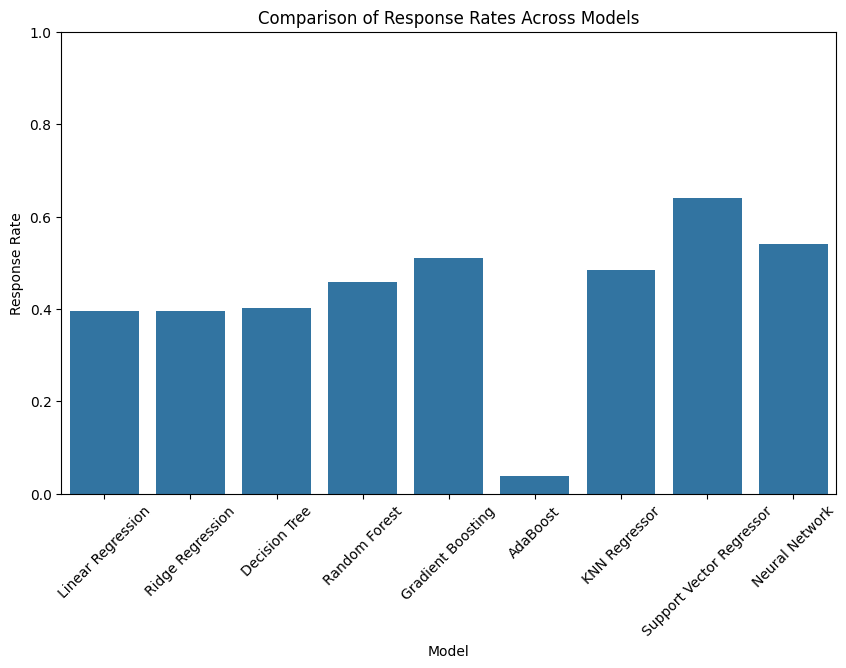

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the response rates dictionary to a DataFrame
response_df = pd.DataFrame(list(response_rates.items()), columns=['Model', 'Response Rate'])

# Plotting the response rates as a bar plot (or boxplot if needed)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Response Rate', data=response_df)
plt.title("Comparison of Response Rates Across Models")
plt.xlabel("Model")
plt.ylabel("Response Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Since response rates are fractions
plt.show()


In [27]:
#effectiveness of stage 2 allotment
count = 0
for i in diff:
  if i>0:
    count+=1
print(count/len(diff))


0.4789285714285714


In [28]:
#updating treatment effectiveness score for those showing favourable outcome
updated_sample = sampled_patients.copy()
updated_sample['treatment_effectiveness'] = rf.predict(X)
updated_sample

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years,treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
29138,62,2,2,1,30,6,Beam radiation,Yes,Radiation after surgery,6,0,3,1.000000,0.010101,0.030030,0.738095,13.179845
30181,66,2,2,1,25,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,3,1,2,0.000000,0.000000,0.025025,0.785714,14.092947
19169,42,1,1,1,35,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,1,1,1,0.000000,0.000000,0.035035,0.500000,8.920713
12410,51,2,2,1,12,0,Beam radiation,No/Unknown,Radiation after surgery,3,1,1,0.000000,0.000000,0.012012,0.607143,10.904579
22122,70,2,2,1,10,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,2,0.000000,0.000000,0.010010,0.833333,14.980220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19717,76,1,1,1,24,1,Beam radiation,Yes,Radiation after surgery,9,0,3,0.111111,0.001122,0.024024,0.904762,16.232340
2766,58,2,2,1,12,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,1,0.000000,0.000000,0.012012,0.690476,12.404663
23653,71,2,2,1,10,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,4,1,1,0.000000,0.000000,0.010010,0.845238,15.194710
21693,52,3,3,3,13,0,Beam radiation,No/Unknown,Radiation after surgery,7,1,2,0.000000,0.000000,0.013013,0.619048,11.119482


In [29]:
#taking the patients with positive outcomes

filtered_sampled_patients = updated_sample[rf.predict(X) > sampled_patients['treatment_effectiveness']]
filtered_sampled_patients.value_counts('treatment')


,count
treatment,
2,463
1,441
3,437


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
#filtered_sampled_patients['treatment'] = filtered_sampled_patients['assigned_group']
#filtered_sampled_patients.drop('assigned_group',axis=1,inplace=True)


X_filtered = filtered_sampled_patients[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)',
             'Derived HER2 Recode (2010+)','CS tumor size (2004-2015)','Regional nodes positive (1988+)',
               'Regional nodes examined (1988+)']]
Y_filtered = filtered_sampled_patients['treatment']

kf = KFold(n_splits=5, shuffle=True, random_state=1)  # Use 5 folds; you can adjust this number
for train_index, test_index in kf.split(X_filtered):
    X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
    y_train, y_test = Y_filtered.iloc[train_index], Y_filtered.iloc[test_index]

    log = LogisticRegression(max_iter=1500)
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)







In [33]:
filtered_sampled_patients

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years,treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
29138,62,2,2,1,30,6,Beam radiation,Yes,Radiation after surgery,6,0,3,1.000000,0.010101,0.030030,0.738095,13.179845
30181,66,2,2,1,25,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,3,1,2,0.000000,0.000000,0.025025,0.785714,14.092947
12410,51,2,2,1,12,0,Beam radiation,No/Unknown,Radiation after surgery,3,1,1,0.000000,0.000000,0.012012,0.607143,10.904579
22122,70,2,2,1,10,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,2,0.000000,0.000000,0.010010,0.833333,14.980220
12041,76,2,1,1,12,0,Beam radiation,No/Unknown,Radiation after surgery,2,1,3,0.000000,0.000000,0.012012,0.904762,16.262711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19717,76,1,1,1,24,1,Beam radiation,Yes,Radiation after surgery,9,0,3,0.111111,0.001122,0.024024,0.904762,16.232340
2766,58,2,2,1,12,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,1,0.000000,0.000000,0.012012,0.690476,12.404663
23653,71,2,2,1,10,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,4,1,1,0.000000,0.000000,0.010010,0.845238,15.194710
21693,52,3,3,3,13,0,Beam radiation,No/Unknown,Radiation after surgery,7,1,2,0.000000,0.000000,0.013013,0.619048,11.119482


# STAGE-III ALLOTMENT

In [34]:
remaining_df = df_main.drop(filtered_sampled_patients.index)
remaining_df

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years,treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
0,54,1,1,2,25,3,Beam radiation,Yes,Radiation after surgery,14,1,9,0.214286,0.002165,0.025025,0.642857,11.510556
1,59,2,1,1,36,3,Beam radiation,Yes,Radiation after surgery,19,1,9,0.157895,0.001595,0.036036,0.702381,12.562811
2,54,2,2,1,6,0,Beam radiation,No/Unknown,Radiation after surgery,5,1,3,0.000000,0.000000,0.006006,0.642857,11.559417
3,58,2,2,1,1,0,Beam radiation,No/Unknown,Radiation after surgery,1,1,3,0.000000,0.000000,0.001001,0.690476,12.426569
4,89,1,2,1,17,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,17,0.000000,0.000000,0.017017,1.059524,19.037395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35303,56,2,2,1,15,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,7,1,18,0.000000,0.000000,0.015015,0.666667,11.969970
35305,55,2,2,1,30,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,17,0.000000,0.000000,0.030030,0.654762,11.725654
35328,51,3,3,3,999,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,98,0,18,0.000000,0.000000,1.000000,0.607143,8.928571
35345,64,2,1,1,65,10,Beam radiation,No/Unknown,Radiation after surgery,11,0,3,0.909091,0.009183,0.065065,0.761905,13.538242


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the neural network model
from keras.layers import LeakyReLU

def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.01))  # Apply LeakyReLU with a small negative slope (alpha)
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model


# Initial training data
initial_batch_size = len(filtered_sampled_patients)
initial_batch = filtered_sampled_patients

X_initial = initial_batch[['Age at diagnosis','ER Status Recode Breast Cancer (1990+)',
                           'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
                           'CS tumor size (2004-2015)', 'Regional nodes positive (1988+)',
                           'Regional nodes examined (1988+)', 'treatment']]
Y_initial = initial_batch['treatment_effectiveness']

# Create and train the neural network model
model = create_nn_model(X_initial.shape[1])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_initial, Y_initial, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 133.5645 - val_loss: 6.0307
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3896 - val_loss: 0.4374
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3126 - val_loss: 0.2036
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1587 - val_loss: 0.1356
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1545 - val_loss: 0.1380
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1047 - val_loss: 0.1046
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1011 - val_loss: 0.1003
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0945 - val_loss: 0.1119
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0796 - val_loss: 0.0829
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0882 - val_loss: 0.0771
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0742 - val_loss: 0.3896
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

In [54]:
scaler = StandardScaler()
reallot = filtered_sampled_patients.copy()
reallot.drop(filtered_sampled_patients.index, inplace=True)

def process_batch(batch, eff_model, filtered_sampled_patients, log,reallot):
    # Step 1: Retrain the logistic regression model on the updated filtered_sampled_patients data
    X_train_log = filtered_sampled_patients[['Age at diagnosis', 'ER Status Recode Breast Cancer (1990+)',
                                             'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
                                             'CS tumor size (2004-2015)', 'Regional nodes positive (1988+)',
                                             'Regional nodes examined (1988+)']]
    y_train_log = filtered_sampled_patients['treatment']
    X_train_log_scaled = scaler.fit_transform(X_train_log)

    # Retrain the logistic regression model with increased max_iter
    log.fit(X_train_log_scaled, y_train_log)


    # Step 2: Predict the treatment for the current batch using the updated logistic regression model
    batch['treatment'] = log.predict(batch[['Age at diagnosis', 'ER Status Recode Breast Cancer (1990+)',
                                            'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
                                            'CS tumor size (2004-2015)', 'Regional nodes positive (1988+)',
                                            'Regional nodes examined (1988+)']])

    # Step 3: Prepare input features for the neural network model
    X_batch = batch[['Age at diagnosis', 'ER Status Recode Breast Cancer (1990+)',
                     'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
                     'CS tumor size (2004-2015)', 'Regional nodes positive (1988+)',
                     'Regional nodes examined (1988+)', 'treatment']]

    stage_predictions = eff_model.predict(X_batch).flatten()
    diff = stage_predictions - batch['treatment_effectiveness']
    positive_diff_patients = batch[diff > 0]
    negative_diff_patients = batch[diff <= 0]
    improvement_ratio = (diff > 0).sum() / len(diff)
    if improvement_ratio > 0.5:
      filtered_sampled_patients = pd.concat([filtered_sampled_patients, positive_diff_patients], ignore_index=True)
      filtered_sampled_patients.drop_duplicates(inplace=True)

    reallot = pd.concat([reallot, negative_diff_patients], ignore_index=True)
    return filtered_sampled_patients, improvement_ratio



initial_batch_size=len(filtered_sampled_patients)


In [64]:
def iterate_batches(df_main, initial_filtered_sampled_patients, eff_model, batch_size=128):
    # Exclude the initial batch from remaining_df
    remaining_df = df_main.iloc[initial_batch_size:].copy()
    filtered_sampled_patients = initial_filtered_sampled_patients.copy()
    improvement_ratios = []

    while not remaining_df.empty:
        # Get the next batch of data
        batch = remaining_df.iloc[:batch_size]
        remaining_df = remaining_df.iloc[batch_size:]

        # Process the current batch and update the filtered_sampled_patients
        filtered_sampled_patients, improvement_ratio = process_batch(batch, eff_model, filtered_sampled_patients,log,reallot)
        improvement_ratios.append(improvement_ratio)

        # Prepare the input and output data for re-training the model
        X = filtered_sampled_patients[['Age at diagnosis', 'ER Status Recode Breast Cancer (1990+)',
                                       'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
                                       'CS tumor size (2004-2015)', 'Regional nodes positive (1988+)',
                                       'Regional nodes examined (1988+)', 'treatment']]
        Y = filtered_sampled_patients['treatment_effectiveness']
        def adjust_batch_size(improvement_ratio, current_batch_size, min_size=64, max_size=256):
          if improvement_ratio > 0.7:
            return max(min_size, current_batch_size // 2)  # Decrease batch size
          elif improvement_ratio < 0.3:
            return min(max_size, current_batch_size * 2)  # Increase batch size
          return current_batch_size

# In the iterate_batches function, after processing each batch
        batch_size = adjust_batch_size(improvement_ratio, batch_size)

        # Re-train the tuned model with the updated filtered_sampled_patients data
        eff_model.fit(X, Y)

    return filtered_sampled_patients, improvement_ratios

final_df,improved_ratios = iterate_batches(remaining_df, filtered_sampled_patients, model, batch_size=128)

print(improved_ratios)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 1/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0044

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 1/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 1/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0314

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/48 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0016

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0023

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0034

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.4950e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/78 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0037

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/78 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.8953e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 1/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0132

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 1/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.0341e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 1/90 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0101

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 1/90 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0017

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 1/99 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.1620e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
  1/101 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/101 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0184

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/101 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 9.9504e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/101 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0164

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0039

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.9578e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/117 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0061

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8535e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.8905e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/134 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0031

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0537e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/142 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.9813e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/144 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0046

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
  1/144 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 2.3227e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0047

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0024

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/150 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.9081e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 3.9874e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/155 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.9699e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/159 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.2541e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 36/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/161 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.7724e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0047

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/165 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.3711e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/165 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0026

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/174 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 7.6151e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/174 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0021

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/177 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.7273e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/179 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 3.7803e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
  1/181 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0050

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0032

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/185 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0038

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/185 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0019

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/185 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0012

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/192 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 7.0647e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.2801e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/214 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 3.5911e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/214 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 8.0950e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/222 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 4.1082e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/222 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0030

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/228 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0010

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/232 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0053

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/232 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.1592e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/236 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0061

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0027

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 1.2469e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0155
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 7.1304e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/253 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0013

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/254 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.3053e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/254 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 5.6973e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.1743e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/262 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 7.1066e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/269 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0011

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/269 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0036

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/285 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 2.2164e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/285 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0011

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/292 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1.4335e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  1/299 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1.5460e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  1/301 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 6.7518e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/301 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0014

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/301 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.0177e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0021

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0024

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  1/325 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 8.6252e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/325 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 2.5110e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/331 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0014

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/341 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0067

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/349 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 3.1227e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  1/368 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 6.8815e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/379 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 9.4750e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
  1/379 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 3.2023e-04

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  1/379 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0012

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


389/389 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


389/389 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8611e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015
[0.8125, 1.0, 0.109375, 0.0625, 0.2109375, 0.04296875, 0.7109375, 0.0546875, 0.9375, 0.4453125, 0.5390625, 0.046875, 0.015625, 0.12890625, 0.92578125, 0.0390625, 0.9765625, 0.09375, 0.9921875, 0.7109375, 0.90625, 0.265625, 0.171875, 0.70703125, 0.9921875, 1.0, 0.046875, 0.03125, 0.109375, 0.99609375, 0.1796875, 0.41015625, 0.96484375, 0.625, 0.25, 0.99609375, 0.109375, 0.05078125, 0.08984375, 0.09375, 0.9609375, 0.984375, 0.984375, 0.875, 1.0, 0.03125, 1.0, 0.96875, 0.0625, 0.9296875, 0.8125, 1.0, 0.953125, 0.15625, 0.6484375, 0.9609375, 0.328125, 0.046875, 0.984375, 0.9375, 0.390625, 0.125, 0.328125, 0.9921875, 0.015625, 0.90625, 0.90625, 0.96875, 0.921875, 0.953125, 0.0, 0.03125, 0.9921875, 0.265625, 0.9921875, 0.2578125, 0.00390625, 0.01953125, 0.9765625, 0.328125, 0.046875, 0.8515625, 0.03125, 0.96875, 0.21875, 0.00390625, 0.0078125, 0.8671875, 1.0, 0.203125, 0.9765625, 1.0, 0.15625, 0.921875, 0.046875, 0.0234375, 0.93359375, 

In [65]:
count = 0
for i in range(len(improved_ratios)):
  if improved_ratios[i]>=0.5:
    count+=1
print(count/len(improved_ratios))

0.4909090909090909


In [58]:
reallot

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years,treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness


In [60]:
# Step 1: Define columns used to identify patients
identifier_columns = ['Age at diagnosis','ER Status Recode Breast Cancer (1990+)',
                      'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
                      'CS tumor size (2004-2015)', 'Regional nodes positive (1988+)',
                      'Regional nodes examined (1988+)']

# Step 2: Merge burn-in patients with filtered sampled patients based on all identifier columns
merged_df = pd.merge(df_burnin, final_df, on=identifier_columns, suffixes=('_burn_in', '_final'))

# Step 3: Compare Treatment Effectiveness Scores
# Check if the final treatment effectiveness score is higher than the initial one
merged_df['effectiveness_improved'] = merged_df['treatment_effectiveness_burn_in'] < merged_df['treatment_effectiveness_final']

# Calculate the percentage of burn-in patients with improved scores
percentage_improved = merged_df['effectiveness_improved'].mean() * 100

# Display results
print(f"Percentage of burn-in patients with improved treatment effectiveness: {percentage_improved:.2f}%")

# Optionally, you can also inspect the merged_df to see individual patient results
print(merged_df[['treatment_effectiveness_burn_in', 'treatment_effectiveness_final', 'effectiveness_improved']])



Percentage of burn-in patients with improved treatment effectiveness: 14.52%
      treatment_effectiveness_burn_in  treatment_effectiveness_final  \
0                            9.521713                       9.524647   
1                           13.036576                      13.042048   
2                           12.781506                      12.802275   
3                           11.715380                      11.729376   
4                           13.016146                      13.023155   
...                               ...                            ...   
2399                         9.566736                       9.566736   
2400                         9.613221                       9.613956   
2401                        13.253279                      13.253279   
2402                        11.881534                      11.881534   
2403                         8.206538                       8.206538   

      effectiveness_improved  
0                       Tru

In [ ]:
merged_df

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Regional nodes examined (1988+),treatment_burn_in,LNR_burn_in,LNR_normalized_burn_in,...,Chemotherapy recode,Radiation sequence with surgery,stutus_5_years,treatment_final,LNR_final,LNR_normalized_final,tumor_size_normalized_final,age_normalized_final,treatment_effectiveness_final,effectiveness_improved
0,45,2,2,1,50,5,12,2,0.416667,0.004209,...,Yes,Radiation after surgery,1,3,0.416667,0.004209,0.050050,0.535714,9.523785,True
1,61,2,2,1,9,1,3,1,0.333333,0.003367,...,No/Unknown,Radiation after surgery,1,2,0.333333,0.003367,0.009009,0.726190,13.042174,True
2,69,1,1,1,999,1,12,3,0.083333,0.000842,...,Yes,No radiation and/or cancer-directed surgery,1,2,0.083333,0.000842,1.000000,0.821429,12.785908,True
3,55,2,2,2,17,23,32,3,0.718750,0.007260,...,Yes,No radiation and/or cancer-directed surgery,1,2,0.718750,0.007260,0.017017,0.654762,11.728935,True
4,61,2,2,1,15,1,2,1,0.500000,0.005051,...,No/Unknown,Radiation after surgery,1,1,0.500000,0.005051,0.015015,0.726190,13.023875,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,49,2,2,1,27,1,9,3,0.111111,0.001122,...,Yes,No radiation and/or cancer-directed surgery,1,2,0.111111,0.001122,0.027027,0.583333,10.440334,False
3065,66,2,2,1,18,1,2,1,0.500000,0.005051,...,No/Unknown,Radiation after surgery,1,1,0.500000,0.005051,0.018018,0.785714,14.081569,False
3066,45,2,2,1,17,5,6,2,0.833333,0.008418,...,Yes,Radiation after surgery,1,1,0.833333,0.008418,0.017017,0.535714,9.566736,False
3067,45,2,1,1,12,1,9,3,0.111111,0.001122,...,Yes,No radiation and/or cancer-directed surgery,1,1,0.111111,0.001122,0.012012,0.535714,9.613988,True


In [61]:

final_df

,Age at diagnosis,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS tumor size (2004-2015),Regional nodes positive (1988+),Radiation recode,Chemotherapy recode,Radiation sequence with surgery,Regional nodes examined (1988+),stutus_5_years,treatment,LNR,LNR_normalized,tumor_size_normalized,age_normalized,treatment_effectiveness
0,62,2,2,1,30,6,Beam radiation,Yes,Radiation after surgery,6,0,3,1.000000,0.010101,0.030030,0.738095,13.179845
1,66,2,2,1,25,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,3,1,2,0.000000,0.000000,0.025025,0.785714,14.092947
2,51,2,2,1,12,0,Beam radiation,No/Unknown,Radiation after surgery,3,1,1,0.000000,0.000000,0.012012,0.607143,10.904579
3,70,2,2,1,10,0,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,1,1,2,0.000000,0.000000,0.010010,0.833333,14.980220
4,76,2,1,1,12,0,Beam radiation,No/Unknown,Radiation after surgery,2,1,3,0.000000,0.000000,0.012012,0.904762,16.262711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12501,42,1,1,1,60,1,None/Unknown,Yes,No radiation and/or cancer-directed surgery,1,0,3,1.000000,0.010101,0.060060,0.500000,8.829375
12502,56,2,2,1,15,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,7,1,3,0.000000,0.000000,0.015015,0.666667,11.969970
12503,51,3,3,3,999,0,None/Unknown,Yes,No radiation and/or cancer-directed surgery,98,0,3,0.000000,0.000000,1.000000,0.607143,8.928571
12504,64,2,1,1,65,10,Beam radiation,No/Unknown,Radiation after surgery,11,0,3,0.909091,0.009183,0.065065,0.761905,13.538242


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


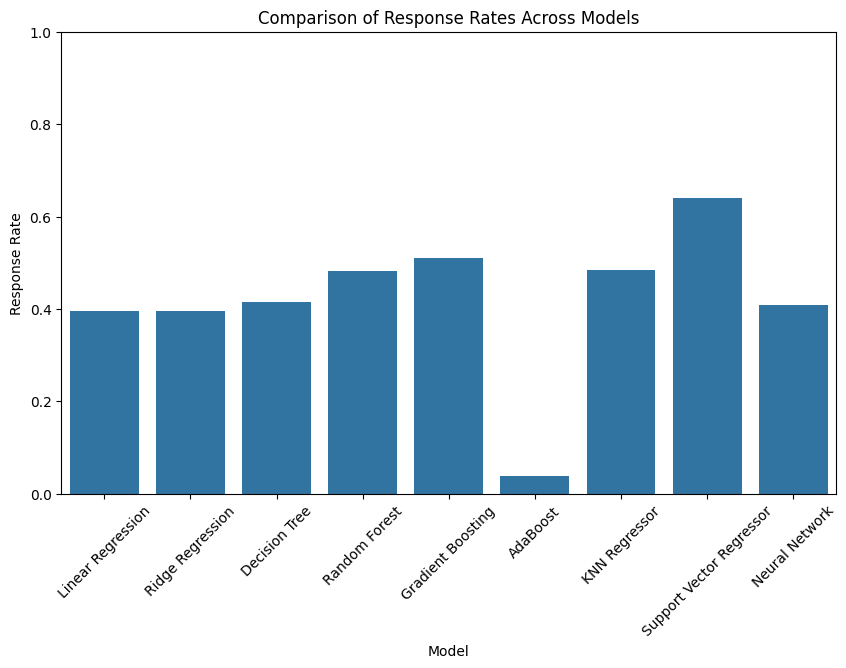

In [73]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense

# Define the machine learning models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "Neural Network": Sequential([
        Dense(128, input_dim=x_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
}

# Train each model and predict the effectiveness score for the batch
predictions = {}
for name, model in models.items():
    if name == "Neural Network":
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
        predictions[name] = model.predict(x_test).flatten()
    else:
        model.fit(x_train, y_train)
        predictions[name] = model.predict(x_test)

response_rates = {}
for name, pred in predictions.items():
    # Calculate the positive difference
    positive_diff = pred > y_test

    # Calculate the response rate as the percentage of positive differences
    response_rate = positive_diff.mean()  # This gives the fraction of positive differences

    response_rates[name] = response_rate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the response rates dictionary to a DataFrame
response_df = pd.DataFrame(list(response_rates.items()), columns=['Model', 'Response Rate'])

# Plotting the response rates as a bar plot (or boxplot if needed)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Response Rate', data=response_df)
plt.title("Comparison of Response Rates Across Models")
plt.xlabel("Model")
plt.ylabel("Response Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Since response rates are fractions
plt.show()


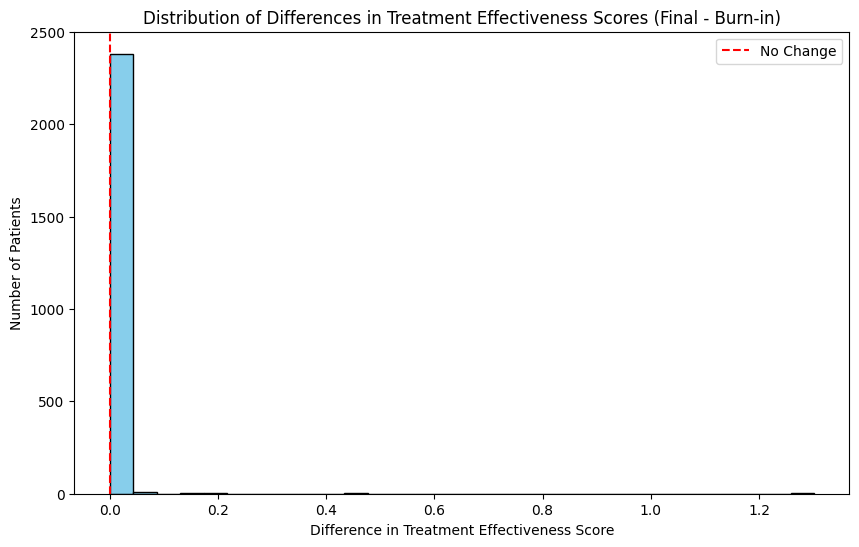

In [79]:
# Calculate the difference in effectiveness scores
merged_df['effectiveness_difference'] = merged_df['treatment_effectiveness_final'] - merged_df['treatment_effectiveness_burn_in']


